In [1]:
import cv2
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import rospy

import pyrealsense2
from realsense_depth import *
import numpy as np
from matplotlib import pyplot as plt

image = None

rospy.init_node("my_pic", anonymous=True)
bridge = CvBridge()
loop_rate = rospy.Rate(0.5) # Node cycle rate (in Hz).

In [21]:
def grab_frame():
    
    frame_color=rospy.wait_for_message('/camera/color/image_raw', Image, timeout=None) #wait_for_message(topic, topic_type, timeout=None): 
    cv_image_color = bridge.imgmsg_to_cv2(frame_color, desired_encoding='rgb8')
    
    frame_depth = rospy.wait_for_message('/camera/depth/image_raw', Image, timeout=None) #wait_for_message(topic, topic_type, timeout=None): 
    cv_image_depth = bridge.imgmsg_to_cv2(frame_depth)
    
    return cv_image_color, cv_image_depth

color_frame, depth_frame = grab_frame()
print("color frame:",color_frame.shape, " Depth frame:",depth_frame.shape)

#Check center pixel distance

point = (320, 240)

#color_frame, depth_frame = grab_frame()

distance = depth_frame[point[1], point[0]]
print("Center of image:", distance, "mm")

color frame: (480, 640, 3)  Depth frame: (480, 640)
Center of image: 347 mm


In [22]:
#color_frame, depth_frame = grab_frame()
df = np.asarray(depth_frame).flatten()
hi=np.histogram(df,bins=100)
#print(hi[0].shape)
#print(hi[1].shape)

#plt.hist(df,bins=1800)
#plt.title("Distance Distribution of depth Image")
#plt.show()
unique, counts = np.unique(df, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  316    74]
 [  317  2565]
 [  318  3231]
 [  319  3194]
 [  320  3141]
 [  321  3133]
 [  322  3108]
 [  323  3077]
 [  324  3047]
 [  325  3013]
 [  326  2985]
 [  327  2963]
 [  328  2933]
 [  329  2900]
 [  330  2869]
 [  331  2844]
 [  332  2844]
 [  333  2817]
 [  334  2758]
 [  335  2758]
 [  336  2735]
 [  337  2689]
 [  338  2703]
 [  339  2634]
 [  340  2651]
 [  341  2602]
 [  342  2581]
 [  343  2584]
 [  344  2532]
 [  345  2507]
 [  346  2520]
 [  347  2501]
 [  348  2474]
 [  349  2454]
 [  350  2430]
 [  351  2425]
 [  352  2406]
 [  353  2379]
 [  354  2374]
 [  355  2352]
 [  356  2331]
 [  357  2317]
 [  358  2286]
 [  359  2270]
 [  360  2269]
 [  361  2250]
 [  362  2208]
 [  363  2215]
 [  364  2199]
 [  365  2153]
 [  366  2171]
 [  367  2135]
 [  368  2123]
 [  369  2103]
 [  370  2101]
 [  371  2063]
 [  372  2068]
 [  373  2041]
 [  374  2021]
 [  375  2023]
 [  376  1980]
 [  377  1989]
 [  378  1957]
 [  379  1949]
 [  380  1924]
 [  381   394]
 [  382   

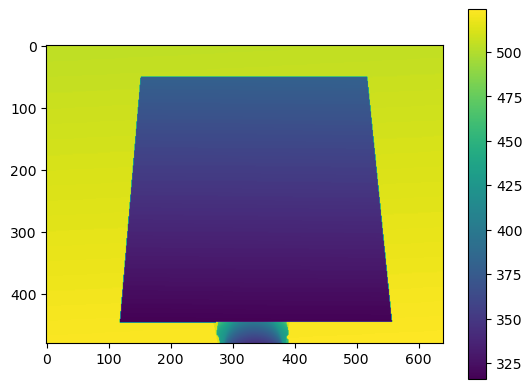

In [23]:
plt.imshow(depth_frame)
plt.colorbar()
plt.show()

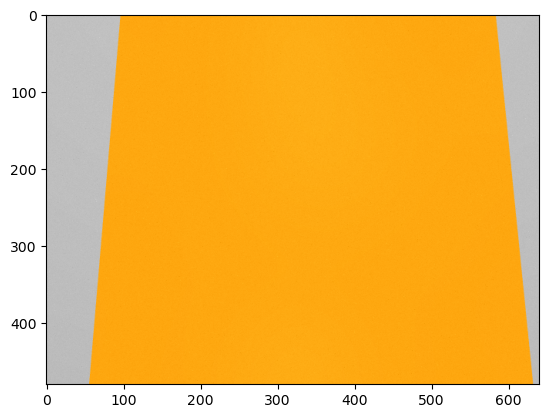

In [24]:
def box_pos(x_coord, y_coord, width, height, centered=0):
    if centered == 0:
        start_point = (x_coord, y_coord) # represents the top left corner of rectangle
        end_point = (x_coord+width-1, y_coord+height-1)  # represents the bottom right corner of rectangle
    elif centered == 1:
        new_x = x_coord - (np.floor(width/2)-1).astype(int)
        new_y = y_coord - (np.floor(height/2)-1).astype(int)
        start_point = (new_x, new_y) 
        end_point = (new_x+width, new_y+height)
    return start_point, end_point

start_point,end_point = box_pos(320, 240, 300, 300, centered=1)  #x,y,width,height, 0-- top left coord, 1--- center coord

cf = color_frame
for i in range (color_frame.shape[0]):
    for j in range (color_frame.shape[1]):
        if depth_frame[i][j] == 0:
            cf[i][j] = [0 , 0, 0] 

plt.imshow(cf)
plt.show()
window_name = 'Filtered_image'  # Window name in which image is displayed

cv2.rectangle(cf, start_point, end_point, (0, 0, 255), 1)
cv2.imshow(window_name, cf)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
color_crop_img = cf[start_point[1]:end_point[1], start_point[0]:end_point[0]]
crop_img = depth_frame[start_point[1]:end_point[1], start_point[0]:end_point[0]]

print(crop_img.shape)
zz=crop_img.T
print(zz.shape)

#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

(300, 300)
(300, 300)


In [28]:
li_FB=[]
for i in range(crop_img.shape[0]):
    ci = crop_img[i][crop_img[i]!=0] #filter out 0 values (mostly errors)
    if len(ci)!=0:
        li_FB.append(round(np.mean(ci))) 
print(li_FB)
print()

li_LR=[]
for i in range(crop_img.shape[1]):
    ci = zz[i][zz[i]!=0] #filter out 0 values (mostly errors)
    if len(ci)!=0:
        li_LR.append(round(np.mean(ci))) 
print(li_LR)


[373, 373, 373, 372, 372, 372, 372, 372, 371, 371, 371, 371, 371, 371, 370, 370, 370, 370, 370, 369, 369, 369, 369, 369, 369, 368, 368, 368, 368, 368, 367, 367, 367, 367, 367, 367, 366, 366, 366, 366, 366, 365, 365, 365, 365, 365, 365, 364, 364, 364, 364, 364, 363, 363, 363, 363, 363, 363, 362, 362, 362, 362, 362, 362, 361, 361, 361, 361, 361, 360, 360, 360, 360, 360, 360, 359, 359, 359, 359, 359, 359, 358, 358, 358, 358, 358, 358, 357, 357, 357, 357, 357, 357, 356, 356, 356, 356, 356, 355, 355, 355, 355, 355, 355, 354, 354, 354, 354, 354, 354, 353, 353, 353, 353, 353, 353, 352, 352, 352, 352, 352, 352, 351, 351, 351, 351, 351, 351, 350, 350, 350, 350, 350, 350, 349, 349, 349, 349, 349, 349, 349, 348, 348, 348, 348, 348, 348, 347, 347, 347, 347, 347, 347, 346, 346, 346, 346, 346, 346, 345, 345, 345, 345, 345, 345, 344, 344, 344, 344, 344, 344, 344, 343, 343, 343, 343, 343, 343, 342, 342, 342, 342, 342, 342, 341, 341, 341, 341, 341, 341, 341, 340, 340, 340, 340, 340, 340, 339, 339, 339,

In [29]:
def filter_res(dat_list, max_steps_blocked, outlier_threshold):
    dat_list=np.asarray(dat_list)
    unique, counts = np.unique(dat_list, return_counts=True)
    #print(np.asarray((unique, counts)).T)
    if len(unique) < max_steps_blocked:
        for i in range(len(counts)):
            if counts[i] < outlier_threshold: #if less than threshold, then filter out the result
                dat_list = np.delete(dat_list, np.where(dat_list == unique[i]))
    return dat_list



#filter_res(li_FB,10,10) #list, max blocked steps(adjust this if window size is reduced from 300x300),
                     #outlier threshold,if more than this value, then its no longer outlier


In [30]:
thresh = 0
#data_FB = np.asarray(li_FB)
#data_LR = np.asarray(li)
data_FB = filter_res(li_FB,10,10)
data_LR = filter_res(li_LR,10,10)

Diff_FB = data_FB[0] - data_FB[-1]
Diff_LR = data_LR[0] - data_LR[-1]

print("Pitch (Front Back)")
print(data_FB[0], data_FB[-1])
print("Difference FB:", Diff_FB)
print()

print("Roll (Left Right)")
print(data_LR[0], data_LR[-1])
print("Difference LR:", Diff_LR)
print()
print()

if abs(Diff_FB) < 10 and abs(Diff_LR) < 10:
    print("Surface is Flat!!")

elif abs(Diff_FB) < 10 and Diff_LR > thresh:
    print("Surface is tilting towards Left")
elif abs(Diff_FB) < 10 and Diff_LR < thresh:
    print("Surface is tilting towards Right")

elif abs(Diff_LR) < 10 and Diff_FB > thresh:
    print("Surface is tilting towards Front")
elif abs(Diff_LR) < 10 and Diff_FB < thresh:
    print("Surface is tilting towards Back")

elif Diff_FB > thresh and Diff_LR < thresh:
    print("Surface is tilting towards Front right")
elif Diff_FB < thresh and Diff_LR < thresh:
    print("Surface is tilting towards Back right")
elif Diff_FB > thresh and Diff_LR > thresh:
    print("Surface is tilting towards Front left")
elif Diff_FB < thresh and Diff_LR > thresh:
    print("Surface is tilting towards Back left")

Pitch (Front Back)
373 324
Difference FB: 49

Roll (Left Right)
347 348
Difference LR: -1


Surface is tilting towards Front


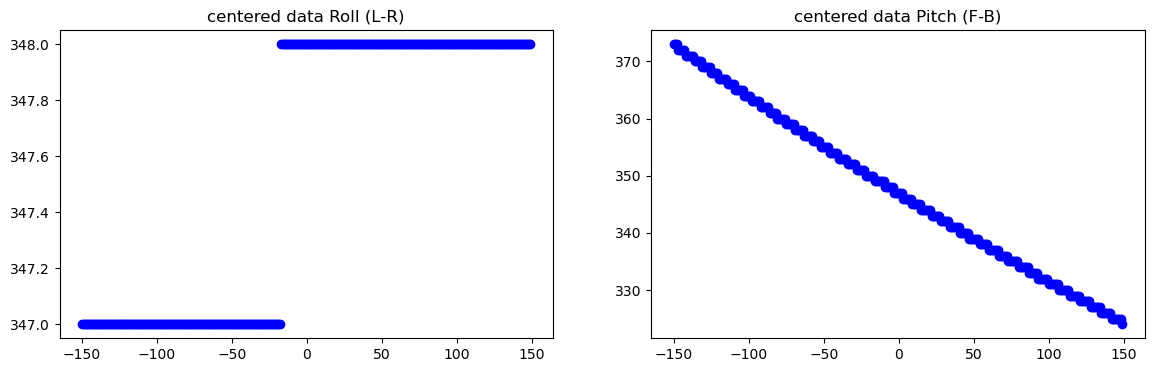

In [31]:
#Pitch (Front Back)
idx=np.floor(len(data_FB)/2).astype(int)
if len(data_FB)%2 == 1:
    xx_fb=np.arange(-idx,idx+1)
else:
    xx_fb=np.arange(-idx,idx)

#Roll (Left Right)
idx=np.floor(len(data_LR)/2).astype(int)
if len(data_LR)%2 == 1:
    xx_lr=np.arange(-idx,idx+1)
else:
    xx_lr=np.arange(-idx,idx)    


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 4))
ax1.set_title('centered data Roll (L-R)')
ax1.plot(xx_lr, data_LR,"ob") 

ax2.set_title('centered data Pitch (F-B)')
a=ax2.plot(xx_fb, data_FB,"ob")


In [20]:
#mn = np.mean(crop_img[crop_img!=0])
#print(mn)